# Import

In [1]:
import os
import numpy as np
import pandas as pd
import copy
import time
import matplotlib.pyplot as plt

import random
import scipy.stats as ss

# Load dataset (RGP100)

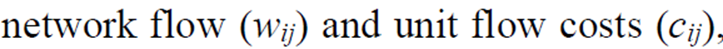

In [2]:
dir_name = os.path.dirname(os.path.realpath('__file__'))

file_name = 'RGP100'
file_path = os.path.join(dir_name,file_name + '.csv')

# Load demand data
w = pd.read_csv(file_path,nrows=100,header=None)
w.index += 1
w.columns += 1

# Load unit cost data
c = pd.read_csv(file_path,skiprows = 101,nrows=100,header=None)
c.index += 1
c.columns += 1

In [3]:
w

1      2      3      4      5      6      7      8      9      10   \
1        0  10195   9908  10060  10236  10000   9996   9982   9991   9914   
2     9901      0   9970   9889   9956  10062   9809  10006   9920   9839   
3     9874   9845      0   9989  10126  10083   9831  10038   9858  10024   
4     9964  10122  10135      0   9959  10058  10022   9953   9998  10089   
5    10050  10121  10153   9876      0   9965   9755  10015  10068   9849   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
96    9980  10025   9940   9881   9954  10124  10021  10018  10016   9927   
97   10155   9800  10027  10115   9863  10228   9965  10138   9879  10022   
98    9955   9999  10065   9948   9949  10108   9911   9864   9795  10021   
99    9858  10076  10108   9931  10205  10008  10038  10134  10117  10034   
100  10176   9962   9912  10019   9790   9843   9898   9990  10043   9978   

     ...    91     92     93     94     95     96     97     98     99     100  
1    ...  10142  10000   9810   9926  10242   9890  10087  10054   9984  10009  
2    ...  10060   9967  10156  10028  10129   9904  10076   9987  10165  10126  
3    ...  10056  10071   9920  10022   9884  10039   9907   9902   9942  10071  
4    ...  10012  10039  10021  10207   9984  10060  10046  10013  10173   9914  
5    ...  10073  10166   9954  10094   9879   9932   9963   9935   9873  10098  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
96   ...   9967  10045  10003  10124  10172      0   9961   9989  10020  10185  
97   ...   9866  10051  10085  10035   9987   9914      0  10074   9925  10020  
98   ...  10058   9995   9945  10037  10036  10035  10108      0   9954  10108  
99   ...   9879   9813   9923  10140  10081   9840   9968   9991      0   9935  
100  ...   9978   9961   9949  10013  10224  10091   9819   9742   9978      0  

[100 rows x 100 columns]

In [4]:
c

1    2    3    4    5    6    7    8    9    10   ...  91   92   93   \
1      0  519  578  946  751  725  553  836  886  695  ...  507  890  978   
2    839    0  734  739  759  535  636  983  940  989  ...  986  713  993   
3    631  888    0  806  703  590  848  612  581  508  ...  709  925  870   
4    939  861  841    0  610  977  671  783  860  648  ...  583  544  576   
5    583  525  738  595    0  708  652  865  893  639  ...  588  947  801   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
96   888  782  945  566  670  806  753  512  698  705  ...  863  744  999   
97   973  928  915  587  840  515  727  524  651  998  ...  811  836  540   
98   766  654  552  848  722  874  654  666  647  690  ...  817  686  639   
99   936  831  855  746  660  985  587  960  803  632  ...  623  939  522   
100  874  761  744  811  969  942  865  779  612  763  ...  841  874  746   

     94   95   96   97   98   99   100  
1    626  832  849  883  815  799  610  
2    842  769  699  630  842  917  642  
3    710  546  580  768  831  514  851  
4    521  974  777  542  990  877  878  
5    990  789  679  747  790  785  578  
..   ...  ...  ...  ...  ...  ...  ...  
96   776  866    0  634  785  948  791  
97   836  735  886    0  829  808  770  
98   795  949  879  891    0  837  789  
99   760  592  697  621  758    0  971  
100  626  535  813  749  516  576    0  

[100 rows x 100 columns]

## Predefined Functions

In [5]:
def check_feasibility(array, n, p):
        flag = True
        hubs = list(set(array))
        for i in range(n):
            if i+1 in hubs:
                if array[i] == i+1:
                    flag *= True
                else:
                    flag *= False
        return flag

## initial solution

In [6]:
def initial_solution(n, p):  
    
    hubs = random.sample(range(1,n),p)
    array = [None] * n
    for i in range(n):
        if i+1 in hubs:
            array[i] = i+1    
        else:
            array[i] = hubs[random.randint(0,p-1)]
    return array

In [7]:
np.random.seed(5)
# test
initial_solution(100, 7)

[65,
 65,
 43,
 65,
 67,
 67,
 67,
 65,
 37,
 99,
 67,
 43,
 65,
 37,
 74,
 65,
 37,
 37,
 43,
 67,
 99,
 67,
 67,
 43,
 99,
 74,
 43,
 99,
 43,
 99,
 67,
 52,
 67,
 67,
 74,
 74,
 37,
 37,
 43,
 99,
 74,
 99,
 43,
 43,
 65,
 74,
 43,
 37,
 52,
 65,
 52,
 52,
 43,
 37,
 74,
 37,
 52,
 37,
 99,
 52,
 43,
 43,
 52,
 99,
 65,
 37,
 67,
 65,
 65,
 65,
 67,
 37,
 99,
 74,
 65,
 43,
 65,
 67,
 37,
 65,
 67,
 99,
 52,
 43,
 65,
 67,
 37,
 99,
 67,
 65,
 65,
 43,
 67,
 65,
 37,
 74,
 37,
 67,
 99,
 67]

## solution evaluation (cost calculation)

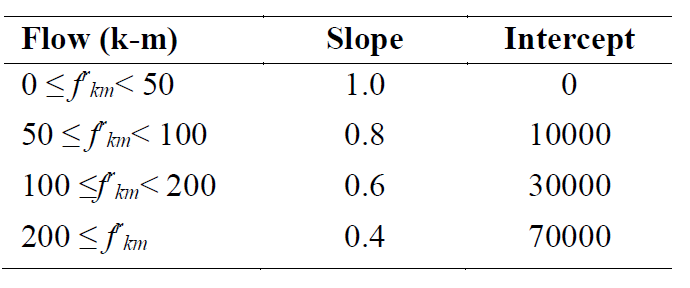

In [8]:
def flowloc_cost_2(flow):
    unit_flow_cost = 0
    
    if flow <0:
        raise ValueError("Flow must be nonnegative")
    elif flow < 50000:
        unit_flow_cost = 0 + 1* flow
    elif flow < 100000:
        unit_flow_cost = 10000 + 0.8* flow
    elif flow < 200000:
        unit_flow_cost = 30000 + 0.6* flow
    else:
        unit_flow_cost = 70000 + 0.4* flow
    return unit_flow_cost


def cost_evaluation(array, w, c):
    total_cost = 0
    
    # identify the hubs
    hubs = set(array)
    
    # calculate collection and distribution cost
    for i in range(1, len(array)+1):
        for j in range(1, len(array)+1):
            total_cost += w[i][j]*(c[i][array[i-1]] + c[array[j-1]][j])
    
    # calculate inter-hub cost
    for k in hubs:
        for m in hubs:
            if k != m:
                interhub_flow = 0
                for i in range(1, len(array)+1):
                    for j in range(1, len(array)+1):
                        if array[i-1] == k and array[j-1] == m:
                            interhub_flow += w[i][j]                   # calculate inter-hub flow
                            
                total_cost += flowloc_cost_2(interhub_flow) * c[k][m]  # calculate inter-hub cost
                
    return total_cost

# GA

## class

In [9]:
iterations = 100

In [10]:
class Ga:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
       
    def ga(self):
        while True:
            parent_1 = initial_solution(self.n, self.p)
            parent_2 = initial_solution(self.n, self.p)

            cutting_point = random.randint(0, 9)
            offspring = parent_1[:cutting_point] + parent_2[cutting_point:]

            if len(set(offspring)) == self.p and check_feasibility(offspring, self.n, self.p):
                break

        return offspring
    
    def ga_best(self):
        ga_initial = self.ga()
        best_ga = ga_initial
        best_ga_cost = cost_evaluation(ga_initial, w, c)

        i = 1
        while i < iterations:
            next_solution = self.ga()
            ga_cost = cost_evaluation(next_solution, w, c)

            if ga_cost < best_ga_cost:
                best_ga = next_solution
                best_ga_cost= ga_cost

            i += 1

        return best_ga, best_ga_cost

In [11]:
time_start = time.time()  

first_ga = Ga(100, 7)
print(first_ga.ga_best())

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([52, 17, 58, 58, 99, 99, 59, 59, 9, 59, 59, 52, 77, 99, 58, 99, 17, 52, 58, 52, 17, 59, 99, 58, 52, 17, 58, 59, 99, 99, 52, 77, 17, 52, 52, 9, 59, 59, 99, 52, 9, 58, 9, 58, 77, 58, 17, 77, 99, 52, 59, 52, 58, 52, 58, 17, 17, 58, 59, 59, 52, 59, 9, 9, 52, 52, 77, 59, 58, 99, 52, 9, 52, 52, 58, 77, 77, 77, 77, 58, 9, 99, 52, 58, 9, 52, 9, 58, 59, 77, 52, 99, 77, 17, 17, 77, 9, 99, 99, 99], 159953009996.40012)
33.01199817657471


## solutions

Hereafter is the solutions for my algorithms, please don't run this part of code due to long computational time.

### (100, 7)

In [27]:
iterations = 550

In [28]:
sum_NC = 0
time_start = time.time() 

for i in range(10):
    solution = Ga(100, 7).ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time() 
time_sum = time_end - time_start  
print(time_sum)

([49, 49, 49, 20, 5, 20, 5, 92, 9, 20, 68, 49, 5, 68, 9, 20, 20, 83, 68, 20, 68, 68, 92, 49, 92, 5, 83, 9, 83, 92, 83, 5, 92, 83, 92, 83, 92, 49, 9, 5, 5, 49, 5, 68, 9, 83, 20, 9, 49, 68, 5, 49, 49, 92, 9, 68, 83, 68, 9, 68, 68, 20, 92, 68, 9, 83, 49, 68, 92, 92, 68, 9, 20, 83, 49, 92, 83, 92, 5, 9, 5, 92, 83, 83, 83, 92, 92, 83, 9, 9, 68, 92, 83, 5, 92, 9, 5, 49, 92, 68], 159797738172.3999)
([18, 9, 3, 24, 18, 9, 3, 63, 9, 24, 11, 11, 3, 3, 33, 3, 9, 18, 33, 24, 63, 11, 18, 24, 3, 24, 9, 24, 3, 11, 3, 9, 33, 63, 33, 18, 9, 18, 18, 9, 11, 11, 11, 63, 3, 3, 63, 24, 18, 9, 11, 18, 33, 24, 9, 3, 33, 24, 24, 24, 18, 18, 63, 9, 3, 63, 11, 3, 18, 18, 63, 24, 63, 3, 11, 63, 63, 63, 63, 63, 18, 3, 11, 63, 63, 11, 24, 24, 11, 18, 11, 9, 3, 63, 9, 9, 63, 24, 3, 63], 159306867708.59995)
([19, 93, 3, 48, 9, 48, 9, 3, 9, 9, 48, 48, 48, 14, 19, 9, 93, 19, 19, 93, 14, 93, 93, 14, 9, 19, 3, 48, 39, 9, 3, 19, 14, 93, 48, 19, 14, 19, 39, 9, 3, 14, 48, 3, 93, 19, 3, 48, 9, 48, 39, 19, 3, 3, 19, 48, 48, 1

In [29]:
sum_NC/10

159228733531.63998

### (100, 10)

In [30]:
iterations = 570

In [31]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Ga(100, 10).ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([76, 14, 20, 14, 76, 20, 54, 8, 9, 20, 76, 9, 91, 14, 14, 91, 32, 36, 8, 20, 20, 76, 32, 32, 91, 9, 36, 8, 20, 53, 54, 32, 9, 32, 36, 36, 36, 9, 53, 91, 14, 91, 8, 9, 76, 8, 20, 36, 91, 53, 53, 54, 53, 54, 8, 32, 76, 76, 32, 54, 53, 32, 8, 9, 20, 14, 8, 53, 76, 8, 54, 20, 36, 53, 54, 76, 14, 8, 14, 36, 91, 54, 91, 32, 91, 32, 76, 91, 36, 32, 91, 8, 36, 32, 76, 36, 14, 53, 32, 32], 158292881931.80008)
([37, 5, 7, 4, 5, 5, 7, 14, 4, 61, 14, 61, 29, 14, 89, 5, 89, 89, 89, 89, 7, 29, 95, 95, 73, 4, 29, 29, 29, 95, 89, 7, 29, 7, 4, 29, 37, 37, 7, 37, 14, 14, 73, 29, 37, 14, 5, 37, 73, 73, 73, 95, 95, 4, 5, 29, 61, 7, 37, 5, 61, 37, 5, 4, 89, 61, 89, 5, 14, 95, 7, 7, 73, 37, 37, 29, 7, 14, 4, 14, 37, 61, 89, 37, 5, 61, 95, 95, 89, 37, 7, 73, 7, 89, 95, 37, 14, 29, 89, 29], 158448051179.40002)
([62, 62, 72, 62, 7, 11, 7, 72, 93, 23, 11, 33, 33, 11, 33, 23, 54, 64, 64, 11, 23, 23, 23, 72, 7, 72, 64, 94, 93, 33, 33, 62, 33, 7, 94, 94, 11, 64, 23, 94, 11, 33, 94, 54, 72, 54, 11, 93, 93, 72, 11,

In [32]:
sum_NC/10

158874169506.38004

# HPSO 

## class

In [18]:
SwarmSize = 10

In [19]:
class Pso_Ga:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
       
    def pso(self):
        first_row = [None] * self.n
        for i in range(self.n):
            first_row[i] = float("%.2f" %(random.random() + random.randint(0 , self.n*self.p)))

        second_row = [None] * self.n
        for i in range(self.n):
            second_row[i] = random.randint(1, self.p)

        array = [None] * self.n
        ranks_first_row = list(ss.rankdata(first_row))
        hubs = [int(i) for i in ranks_first_row][:self.p]  
        allocations = second_row

        for i in range(self.n):
            if i+1 in hubs:
                array[i] = i+1   
            else:
                array[i] = hubs[allocations[i]-1]

        return array, hubs, allocations
    
    
    def cross_over(self):
        particle_1 = self.pso()
        particle_2 = self.pso()

        hubs = particle_1[1]
        allocations = particle_1[2][:round(self.n/2)] + particle_2[2][round(self.n/2):]
        array = [None] * self.n

       
        for i in range(self.n):
            if i+1 in hubs:
                array[i] = i+1    
            else:
                array[i] = hubs[allocations[i] -1]

        return array, hubs, allocations
    
    
    def pso_ga_best(self):        
        pso_ga_initial = self.cross_over()[0]
        best_pso_ga = pso_ga_initial
        best_pso_ga_cost = cost_evaluation(pso_ga_initial, w, c)

        j = 1
        while j < SwarmSize:
            next_solution = self.cross_over()[0]
            pso_ga_cost = cost_evaluation(next_solution, w, c)

            if pso_ga_cost < best_pso_ga_cost:
                best_pso_ga = next_solution
                best_pso_ga_cost= pso_ga_cost

            j += 1

        return best_pso_ga, best_pso_ga_cost

In [20]:
time_start = time.time()  

first_pso_ga = Pso_Ga(100, 7)
print(first_pso_ga.pso_ga_best())

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([64, 30, 91, 4, 82, 4, 30, 82, 64, 4, 4, 4, 91, 30, 38, 38, 38, 64, 38, 70, 64, 64, 64, 70, 70, 64, 64, 64, 70, 30, 4, 91, 91, 82, 91, 64, 64, 38, 70, 70, 82, 91, 64, 64, 82, 82, 70, 64, 38, 70, 70, 38, 38, 4, 91, 91, 4, 82, 70, 70, 70, 30, 38, 64, 64, 70, 82, 91, 64, 70, 30, 91, 82, 4, 82, 70, 30, 70, 30, 82, 30, 82, 4, 30, 30, 91, 30, 70, 64, 30, 91, 82, 82, 30, 82, 82, 64, 82, 38, 4], 162026440849.59988)
2.6599957942962646


## solutions

Hereafter is the solutions for my algorithms, please don't run this part of code due to long computational time.

### (100, 7)

In [33]:
SwarmSize = 680

In [34]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Pso_Ga(100, 7).pso_ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start 
print(time_sum)

([60, 95, 95, 7, 48, 60, 7, 95, 86, 7, 95, 48, 7, 7, 17, 95, 17, 60, 7, 60, 7, 95, 95, 7, 7, 7, 7, 86, 60, 60, 31, 95, 86, 17, 31, 7, 60, 60, 60, 86, 95, 95, 60, 95, 86, 17, 17, 48, 48, 48, 95, 7, 95, 31, 86, 17, 95, 17, 17, 60, 86, 48, 60, 7, 48, 95, 86, 95, 86, 60, 31, 95, 95, 60, 17, 95, 60, 60, 60, 86, 7, 17, 48, 95, 17, 86, 31, 60, 31, 7, 7, 17, 7, 17, 95, 48, 31, 86, 95, 86], 160042581333.0)
([3, 4, 3, 4, 4, 53, 20, 3, 91, 3, 53, 72, 91, 20, 72, 3, 91, 53, 3, 20, 4, 3, 4, 4, 4, 91, 3, 72, 4, 44, 20, 20, 44, 53, 72, 72, 44, 53, 44, 20, 44, 91, 91, 44, 4, 53, 3, 53, 44, 3, 72, 53, 53, 3, 91, 91, 4, 44, 44, 72, 72, 44, 53, 20, 53, 44, 44, 44, 3, 53, 4, 72, 20, 3, 44, 4, 53, 72, 72, 44, 91, 3, 3, 72, 44, 44, 44, 72, 20, 91, 91, 44, 72, 3, 3, 44, 72, 53, 53, 91], 159631427686.8)
([1, 94, 45, 1, 46, 1, 45, 46, 46, 47, 47, 47, 94, 45, 30, 47, 53, 53, 45, 53, 30, 46, 47, 46, 46, 46, 1, 53, 30, 30, 45, 94, 94, 45, 94, 46, 30, 30, 45, 46, 94, 46, 47, 1, 45, 46, 47, 94, 53, 53, 30, 45, 53, 

In [35]:
sum_NC/10

159345700727.92

### (100, 10)

In [36]:
SwarmSize = 590

In [37]:
sum_NC = 0
time_start = time.time() 

for i in range(10):
    solution = Pso_Ga(100, 10).pso_ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time() 
time_sum = time_end - time_start  
print(time_sum)

([55, 61, 41, 55, 5, 32, 7, 5, 17, 5, 41, 61, 32, 66, 7, 32, 17, 55, 73, 17, 55, 66, 7, 17, 41, 66, 5, 66, 73, 17, 32, 32, 45, 17, 17, 32, 66, 7, 66, 55, 41, 55, 73, 73, 45, 7, 32, 55, 17, 5, 55, 66, 41, 41, 55, 17, 61, 41, 17, 5, 61, 41, 73, 41, 45, 66, 55, 17, 5, 41, 32, 73, 73, 41, 5, 5, 7, 61, 32, 61, 73, 73, 61, 41, 55, 55, 32, 73, 55, 61, 5, 17, 61, 73, 73, 73, 32, 73, 55, 5], 159432525645.99985)
([46, 33, 36, 46, 71, 21, 7, 21, 36, 43, 52, 52, 36, 7, 43, 21, 71, 7, 7, 7, 21, 95, 43, 33, 7, 95, 21, 48, 71, 33, 21, 7, 33, 36, 36, 36, 48, 21, 52, 46, 46, 95, 43, 48, 52, 46, 48, 48, 36, 33, 33, 52, 95, 33, 52, 36, 7, 36, 36, 46, 21, 43, 46, 71, 71, 48, 46, 71, 95, 7, 71, 71, 95, 36, 36, 95, 95, 36, 33, 36, 95, 33, 33, 71, 48, 52, 36, 46, 36, 48, 43, 46, 48, 21, 95, 21, 46, 33, 48, 52], 159474502420.3999)
([72, 93, 72, 72, 92, 9, 9, 69, 9, 66, 79, 59, 72, 59, 17, 93, 17, 17, 9, 66, 79, 59, 72, 72, 9, 69, 72, 92, 9, 59, 66, 79, 59, 92, 69, 59, 66, 17, 43, 79, 66, 43, 43, 93, 59, 93, 9

In [38]:
sum_NC/10

158745079923.71994